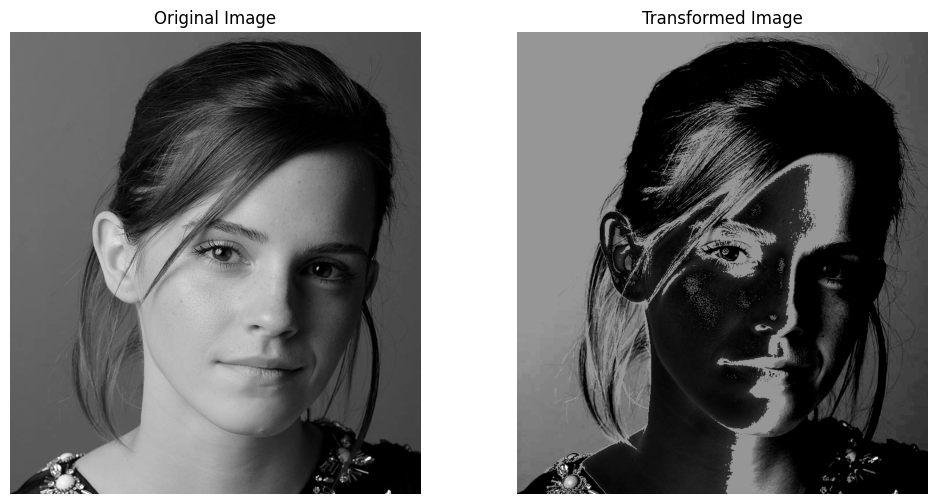

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'utils/emma.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert the image to a numpy array for pixel manipulation
image_np = np.array(image)

# Define the intensity transformation function based on the given plot
def intensity_transformation(pixel_value):
    if 0 <= pixel_value <= 50:
        return 0
    elif 50 < pixel_value <= 100:
        return 3 * (pixel_value - 50)  # Linear increase to 150 at pixel value 100
    elif 100 < pixel_value <= 150:
        return 150  # Constant output between 100 and 150
    elif 150 < pixel_value <= 200:
        return 50 - (50 * (pixel_value - 150) / 50)  # Linear decrease to 50 at pixel value 200
    elif 200 < pixel_value <= 255:
        return 255 - (255 - 50) * (255 - pixel_value) / 55  # Linear increase to 255
    else:
        return pixel_value  # No change if pixel value is outside bounds (just in case)

# Vectorize the transformation function to apply to the whole image
vectorized_transformation = np.vectorize(intensity_transformation)

# Apply the transformation
transformed_image_np = vectorized_transformation(image_np).astype(np.uint8)

# Convert the numpy array back to an image
transformed_image = Image.fromarray(transformed_image_np)

# Display the original and transformed images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(image_np, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Transformed image
axes[1].imshow(transformed_image_np, cmap='gray')
axes[1].set_title("Transformed Image")
axes[1].axis('off')

plt.show()